# 2. Shell and other kinds of programming

## Shell programming: advanced parts of the <a href="https://www.tutorialspoint.com/unix/" target="_blank">bash tutorial</a>

As you go through the tutorial, copy the example commands into your jupyter notebook and test them to make sure you understand how they work. Feel free to do that more than once, changing the given examples as you wish. An example from the "Using Shell Arrays" section of the tutorial would look like this:

In [1]:
%%bash

NAME[0]="Zara"
NAME[1]="Qadir"
NAME[2]="Mahnaz"
NAME[3]="Ayan"
NAME[4]="Daisy"
echo "First Method: ${NAME[*]}"
echo "Second Method: ${NAME[@]}"

First Method: Zara Qadir Mahnaz Ayan Daisy
Second Method: Zara Qadir Mahnaz Ayan Daisy


You can also save the commands into a shell script and execute it as a "command" in your own filespace:

In [2]:
%%bash
mkdir -p ~/5P10/Lab2

In [3]:
%cd ~/5P10/Lab2

/home/esternin/5P10/Lab2


In [4]:
%%file list.sh
#!/bin/bash

NAME[0]="Zara"
NAME[1]="Qadir"
NAME[2]="Mahnaz"
NAME[3]="Ayan"
NAME[4]="Daisy"
echo "First Method: ${NAME[*]}"
echo "Second Method: ${NAME[@]}"

Overwriting list.sh


In [5]:
%%bash
chmod 755 list.sh
./list.sh

First Method: Zara Qadir Mahnaz Ayan Daisy
Second Method: Zara Qadir Mahnaz Ayan Daisy


In [6]:
%%bash
echo "Hello, world!"

### These are all of the bash environment variables (LOTS OF LINES!):
#set

### These are the variables that have "TRIUMF" in their name:
set | grep TRIUMF

### Select a specific variable and parse the NAME=VALUE for VALUE:
set | grep TRIUMF_FONTS | cut -d= -f2

### instead of typing it, assign it to a variable:
FDIR=`set | grep TRIUMF_FONTS | cut -d= -f2`

echo "Fonts are in \"$FDIR\", look there"

Hello, world!
TRIUMF_FONTS=/usr/local/lib
TRIUMF_PLOTTER_TYPE=PSA
TRIUMF_TERMINAL_TYPE=X
/usr/local/lib
Fonts are in "/usr/local/lib", look there


In [7]:
%%bash
VARS=`set | grep TRIUMF`

for v in $VARS
do
  name=`echo $v | cut -d= -f1`
  value=`echo $v | cut -d= -f2`
  echo "Environment variable \"$name\" has a value \"$value\" "
done

Environment variable "TRIUMF_FONTS" has a value "/usr/local/lib" 
Environment variable "TRIUMF_PLOTTER_TYPE" has a value "PSA" 
Environment variable "TRIUMF_TERMINAL_TYPE" has a value "X" 


## Writing and compiling programs

Let's try a very simple C program. "Running" a program requires that you first 
<ul>
    <li>compile it, i.e. convert the human-readable <i>source</i> into machine codes, or <i>object</i>;</li>
    <li>link object to the system libraries to make a complete <i>executable</i>;</li>
    <li>ensure the resulting file has executable flag set.</li>
</ul>
Usually, the compiler can take care of all of these steps at once.

In [8]:
%%file hello.c
#include <stdio.h>
#include <math.h>

int main() {
  double f;
    
  f=atan(3.);
  printf("Hello, world!  atan(3)=%f\n",f);
    
  return 0; /* a non-zero return reports an error to OS */
  }

Overwriting hello.c


In [9]:
%%bash
cc hello.c
./a.out

Hello, world!  atan(3)=1.249046


The above command <code>cc</code> (that stands for "C Compiler") has many switches. Without them, it defaults to a full compile-and-link cycle and places the executable into an executable called <code>a.out</code>, which can get confusing if there is more than one program. This is better:

In [10]:
%%bash
cc -o hello hello.c
./hello

Hello, world!  atan(3)=1.249046


The link stage of the <code>cc</code> command found all the libraries it needed, including the system library that provided the <code>atan()</code> function.

## Homework

Use bash commands ar, nm, grep, find, cut, and bash loops as needed to find which of the \*.a or \*.so files in /usr/lib64 and/or in /lib and/or /lib64 and all of their subdirectories contains a subroutine to calculate arctan().  Ignore symbolic link files, just use the actual library file, to remove duplication.

## Solution

In [11]:
%%bash
# executables in this directory become personal "commands"
if [ ! -d ~/bin ]; then
  mkdir ~/bin
fi

In [12]:
%%file ~/bin/search_libs
#!/bin/sh

# could make it into a parameter
LIBDIR=/usr/lib

# check input line for parameters, at least one is mandatory
if [ $# -lt 1 ]; then
  echo "  usage: $0 subroutine_name"
  exit 1
fi

# if more than one, warn the user we are ignoring the extra input
if [ $# -gt 1 ]; then
  echo "  $0 warning: extra input \"$2 ...\" ignored"
fi

FILES=`find -P $LIBDIR \( -name "*.a" -o -name "*.so" \)`

for f in $FILES
do
   # figure out the file type, apply appropriate command
   ELF=`file $f | grep "shared object"`
   AR=`file $f | grep "ar archive"`
    
   # if both of the above strings are empty, this is not a file for us 
   if [ "$ELF" != "" ]; then
     nm -D --defined-only --print-file $f | grep "$1\$"
   elif [ "$AR" != "" ]; then
     FOUND=`ar -t $f | grep "$1"`
     if [ ! -z "$FOUND" ]; then # another way of checking if string is empty
        echo "$f:$FOUND"
     fi
   fi
done
    
exit 0

Overwriting /home/esternin/bin/search_libs


In [13]:
%%bash
chmod 755 ~/bin/search_libs

In [14]:
%%bash 
search_libs atan

/usr/lib/jvm/java-1.7.0-openjdk-1.7.0.261-2.6.22.2.el7_8.x86_64/jre/lib/amd64/libjava.so:0000000000011620 T Java_java_lang_StrictMath_atan
/usr/lib/jvm/java-1.8.0-openjdk-1.8.0.382.b05-1.el7_9.x86_64/jre/lib/amd64/libjava.so:00000000000127f0 T Java_java_lang_StrictMath_atan
/usr/lib/i686/nosegneg/libm-2.17.so:0000ab20 W atan
/usr/lib/i686/nosegneg/libm-2.17.so:000153e0 W catan
/usr/lib/libm-2.17.so:0000a8e0 W atan
/usr/lib/libm-2.17.so:00015190 W catan
/usr/lib/jalbum/jre64/lib/libjava.so:00000000000146d0 T Java_java_lang_StrictMath_atan


In [15]:
%%bash 
search_libs start_main

/usr/lib/i686/nosegneg/libc-2.17.so:0001a200 T __libc_start_main
/usr/lib/libc-2.17.so:0001a1e0 T __libc_start_main


We need to link to the libm\*.so library to get the <code>atan()</code> function, and to libc\*.so to initiate the running of a <code>main()</code>. It so happens that these are on the default list, so specifying any libraries is not necessary. However, the following should fail to link, and should produce a few errors:

In [16]:
%%bash
cc -nodefaultlibs -o hello hello.c

/usr/lib/gcc/x86_64-redhat-linux/4.8.5/../../../../lib64/crt1.o: In function `_start':
(.text+0x12): undefined reference to `__libc_csu_fini'
/usr/lib/gcc/x86_64-redhat-linux/4.8.5/../../../../lib64/crt1.o: In function `_start':
(.text+0x19): undefined reference to `__libc_csu_init'
/usr/lib/gcc/x86_64-redhat-linux/4.8.5/../../../../lib64/crt1.o: In function `_start':
(.text+0x25): undefined reference to `__libc_start_main'
/tmp/cc9zQUWU.o: In function `main':
hello.c:(.text+0x2e): undefined reference to `printf'
collect2: error: ld returned 1 exit status


CalledProcessError: Command 'b'cc -nodefaultlibs -o hello hello.c\n'' returned non-zero exit status 1.

To fix the errors, we need to tell the linker where to look. The compiler/linker switch <code>-lxxx</code> forces it to look for a file <code>libxxx.so.\*</code> in the usual directories.  The directory to look in can be also set, using the <code>-L/some_directory/subdir</code> switch.  Strictly speaking, in our case we should use <code>-L/lib -lm-2.17</code> but 
<ul>
    <li>by default the compiler is already looking in <code>/lib</code>, and
    <li>the system has a symbolic link, <code>/lib/libm.so.6 -> /lib/libm-2.17.so</code> 
</ul>
so this (simplified) version without specific version numbers should be sufficient: 

In [17]:
%%bash
cc -nodefaultlibs -o hello hello.c -lm -lc
./hello

Hello, world!  atan(3)=1.249046


## Using <code>make</code>

The <code>make</code> command treats spaces and TAB characters differently than the <code>jupyter notebook</code>.  The following <code>javascript</code> commands should reconfigure jupyter to treat TABS as characters, not replace them with 4 spaces, as it does by default. This is necessary because the syntax of Makefiles mandates the use of TABs.

In [18]:
%%javascript
IPython.tab_as_tab_everywhere = function(use_tabs) {
    if (use_tabs === undefined) {
        use_tabs = true; 
    }
    // apply setting to all current CodeMirror instances
    IPython.notebook.get_cells().map(
        function(c) {  return c.code_mirror.options.indentWithTabs=use_tabs;  }
    );
    // make sure new CodeMirror instances created in the future also use this setting
    CodeMirror.defaults.indentWithTabs=use_tabs;
    };
IPython.tab_as_tab_everywhere()

<IPython.core.display.Javascript object>

In [19]:
%%file Makefile
hello: hello.c
	cc -o hello hello.c

Overwriting Makefile


In [20]:
%%bash
rm -f hello
make
./hello

cc -o hello hello.c
Hello, world!  atan(3)=1.249046


This was super simple, and for such a simple "project" of only one source-code file probably unnecessary, but we can very quickly make this Makefile more robust and demonstrate some of the more advanced features of make. In larger projects, makefiles save a lot of time.

For details, consult this <a href="https://www.tutorialspoint.com/makefile/" target="_blank">makefile tutorial</a>.

In [21]:
%%file Makefile

OBJ = hello.o

# these are pre-defined, but we can also change the default behaviour, if we have multiple compilers
CC = gcc
#CC = icc
CFLAGS = -O
LIBS = -lm

# special abbreviations: $@ is the file to be made; $? is the changed dependent(s).

hello: $(OBJ)
#	@echo -n " 2.link:    "
	$(CC) $(CFLAGS) -o $@ $(OBJ) $(LIBS)

# this is the default implicit rule to convert xxx.c into xxx.o 
.c.o:
#	@echo -n " 1.compile: "
	$(CC) $(CFLAGS) -c $<

clean:
#	@echo -n " 0.cleanup: "
	rm -f hello a.out *.o *~ core

Overwriting Makefile


In [22]:
%%bash
make clean; make
./hello

rm -f hello a.out *.o *~ core
gcc -O -c hello.c
gcc -O -o hello hello.o -lm
Hello, world!  atan(3)=1.249046


## Gaussian packet evolution: a C project

More homework! This is a week-long project to graphically illustrate what happens to a Gaussian wave packet (we will make it up by adding a few individual waves) impacting on a barrier. We want to observe how some of the packet is reflected, and some undergoes quantum-mechanical tunneling, so both a reflected and a transmitted packet emerges after the impact.  We will run the program repeatedly, changing the number of wave making up the packet, the number of points to plot, the initial energy of the incoming packet, etc. The physics of this scattering process will get discussed next, but first let's set up the mechanics of the new project:
<ul>
	<li>make a project subdirectory
	<li>create a basic skeleton of a program that can read and parse user input (though does not compute anything at first)
	<li>have a basic Makefile in place
</ul>
<p>
The second part of the homework is to try to figure out what is going on in an old Fortran program that does the same thing. We do not know either Fortran or C syntax, but hopefully the computational content, i.e. the algorithmic core, will be self-explanatory. The task is to "port", or convert this old code to C, and learn some basic C programming in the process.

In [23]:
%%bash
rm -rf packet
mkdir packet

In [24]:
%cd packet

/home/esternin/5P10/Lab2/packet


In [25]:
%%file packet.c
/*
 * packet.c
 *   packet - generate a Gaussian wavepacket impacting on an energy barrier.
 *
 * Completed: January.2018 (c) E.Sternin
 * Revisions: 
 *
 */

#ifndef VERSION           /* date-derived in Makefile */
#define VERSION "2018.01" /* default, that's when we first wrote the program */
#endif

#include <stdarg.h>
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <ctype.h>
#include <unistd.h>
#include <sys/types.h>
#include <sys/stat.h>
#include <fcntl.h>

#define MAX_STR 256

/* Global variables */

static char whoami[MAX_STR] ;        /* argv[0] will end up here */
static int  verbosity;               /* Show detailed information */
static char options[] = "Vvhp:t:";   /* command-line options, : means takes a value */
static char help_msg[] = "\
%s [<options>]\n\
\t-V        report version information\n\
\t-v        increase verbosity, may combine several\n\
\t-p #      number of points for the packet\n\
\t-t #      time since the beginning\n\
\t-h        help message\n\
\n\
e.g.\tpacket -v -p 601 -t 20\n" 
;

/*************************************************service routines************/

void __attribute__((noreturn)) die(char *msg, ...) {
  va_list args;
  va_start(args, msg);
  vfprintf(stderr, msg, args);
  fputc('\n', stderr);
  exit(1);
  }

/***************************************************************** main *********/
int main(int argc, char **argv) {
  int    i,p;
  double t;

/*
 *  default values, may get changed by the command-line options
 */
  verbosity = 0;    /* 0 = quiet by default, 1 = info, 2 = debug */	
  p = 25;           /* default to 25 points in the packet */
  t = 0;

  strncpy(whoami, argv[0], MAX_STR);

  while ((i = getopt(argc, argv, options)) != -1)
    switch (i) {
      case 'V':
         printf(" %s: version %s\n",whoami,VERSION);
         break;
      case 'v':
         verbosity++;
         if (verbosity > 1) printf(" %s: verbosity level set to %d\n",whoami,verbosity);
         break;
      case 'h':
         die(help_msg,whoami);
         break;
      case 'p':
         if ( ((p = atoi(optarg)) > 10000) || p < 10 )
           die(" %s: -p %d is not a valid number of points (10..10000)\n",whoami,p);
         if (verbosity > 1) printf(" %s: Number of points = %d\n",whoami,p);
         break;
      case 't':
         if ( ((t = atof(optarg)) < 0) )
           die(" %s: -t %d is not a valid time\n",whoami,t);
         if (verbosity > 1) printf(" %s: time = %f\n",whoami,t);
         break;
      default:
         if (verbosity > 0) die(" try %s -h\n",whoami);	/* otherwise, die quietly */
         return 0;
      }

/*
 * when we get here, we parsed all user input, and are ready to calculate things
 */

  for (i=0; i < p; i++) { 
     if (verbosity > 0) printf("%d\t%f\n",i,i*t);
     }

  return 0;
  }


Writing packet.c


In [26]:
%%bash
cc -DVERSION="\"`date '+%Y-%b-%d-%H:%M'`\"" -o packet packet.c
./packet -vvvV -p10

 ./packet: verbosity level set to 2
 ./packet: verbosity level set to 3
 ./packet: version 2023-Sep-12-12:52
 ./packet: Number of points = 10
0	0.000000
1	0.000000
2	0.000000
3	0.000000
4	0.000000
5	0.000000
6	0.000000
7	0.000000
8	0.000000
9	0.000000


In [27]:
%%file Makefile

OBJ = packet.o

# these are pre-defined, but we can also change the default behaviour, if we have multiple compilers
CC = cc
#CC = icc
CFLAGS = -O -DVERSION="\"`date '+%Y-%b-%d-%H:%M'`\"" 
LIBS = -lm

# special abbreviations: $@ is the file to be made; $? is the changed dependent(s).

packet: $(OBJ)
	$(CC) $(CFLAGS) -o $@ $(OBJ) $(LIBS)

# this is the default implicit rule to convert xxx.c into xxx.o 
.c.o:
	$(CC) $(CFLAGS) -c $<

clean:
	rm -f packet *.o *~ core

Writing Makefile


In [28]:
%%bash
make clean; make
./packet -Vvvv -p 11 -t 25

rm -f packet *.o *~ core
cc -O -DVERSION="\"`date '+%Y-%b-%d-%H:%M'`\""  -c packet.c
cc -O -DVERSION="\"`date '+%Y-%b-%d-%H:%M'`\""  -o packet packet.o -lm
 ./packet: version 2023-Sep-12-12:52
 ./packet: verbosity level set to 2
 ./packet: verbosity level set to 3
 ./packet: Number of points = 11
 ./packet: time = 25.000000
0	0.000000
1	25.000000
2	50.000000
3	75.000000
4	100.000000
5	125.000000
6	150.000000
7	175.000000
8	200.000000
9	225.000000
10	250.000000


Now that we have a skeleton of a C program working, let's examine the old Fortran code to see how it works and what its output looks like.

In [29]:
%%file packet.f
C packet.f -- propagation of a Gaussian wave  packet through a barrier in 1D
C	x = coordinate (in units of a, the barrier is from -a to +a)
C	P = wavefunction  (not normalized)
C	E = energy of the wavefunction (in units of V, the barrier height)
C
C	Written by:	E.Sternin
C	Completed:	30.03.93
C=======================================================================	
	real*4		x(601),x0,p0,sp,p_now,p_step,Pi,A0,t
	complex*8	P(601),I,A
	integer		j,Nargs,Nwaves
	character*80 	buffer

	Nwaves = 20	! add up (2*Nwaves+1) eigenwaves to form a packet
	x0 = -25.	! start the packet far away from the barrier
	p0 = 0.5	! keep incident energy low, E=0.5**2 < 1 (units of V)
	sp = 0.1	! p0 +/- 4 sigma_p > 0,	all eigenwaves move to the right
	 
	Nargs = iargc() 	! arguments supplied on the command line ?
	if (Nargs .lt. 1) then 
	  write(*,'(A,$)') '  Error: need time t: '
	  read(*,*) t
	else
	  call getarg(1,buffer)
	  read(buffer,*) t
	end if

	I = cmplx(0.,1.)		!complex i
	Pi = 2.*acos(0.)
	A0 = 1./sqrt( sqrt(2.*Pi) * sp ) /float (2*Nwaves+1)

	do j = 1,601
	  x(j) = -75 + (j-1)*0.25
	  P(j) = cmplx(0.,0.)
	end do

	p_step = 4.*sp/float(Nwaves)	! calculate over +/- 4*sigma_p
	do j = -Nwaves,Nwaves		! in Nwaves steps
	  p_now = p0 + j * p_step 
	  E = p_now**2
	  A = A0*exp( - ( (p_now-p0)/(2*sp) )**2 - I*(p_now*x0 + E*t) )
	  call add_wave(x,P,A,E)
	end do

C..output the saved values as is, without normalization
  10	do j=1,	601
	  write(*,*) x(j),abs(P(j))**2,real(P(j)),aimag(P(j))
	end do
	end

C=======================================================================	
	subroutine add_wave(x,P,A,E)
C..adds the specified wave to the the supplied complex storage array P
C  the values of Psi are only calculated at points given in real array x 
	real*4 		x(601),E
	complex*8	P(601),I,A,k1,K2,C1,b,c,d,f

	I = cmplx(0.,1.)	!complex i

	k1 = sqrt(cmplx(E,0.))
	K2 = sqrt(cmplx(E-1.,0.))

	C1 = -2*k1*K2-k1**2-2*k1*K2*exp(4*I*K2)+exp(4*I*K2)*k1**2
     *	-K2**2+K2**2*exp(4*I*K2)

	b = (k1**2-K2**2)/ C1 *(exp(2*I*(2*K2-k1))-exp(-2*I*k1))
	c = -2*k1*(K2+k1)/ C1 *exp(I*(K2-k1))
	d = (-2*K2+2*k1)*k1/ C1 *exp(I*(-k1+3*K2))
	f = -4*k1*K2/ C1 *exp(2*I*(K2-k1))

	do j = 1,296		! left of the barrier, x < -1
	  P(j) = P(j) + A * ( exp(I*k1*x(j)) + b*exp(-I*k1*x(j)) )
	end do
	do j=297,304		! inside the barrier, -1 < x < 1
	  P(j) = P(j) + A * ( c*exp(I*K2*x(j)) + d*exp(-I*K2*x(j)) )
	end do
	do j=305,601		! to the right of the barrier, x > 1
	  P(j) = P(j) + A * f*exp(I*k1*x(j))
	end do
	  
 	return
	end

Writing packet.f


In [30]:
%%bash
gfortran -o packet packet.f
./packet 40

  -75.0000000       8.52197530E-08   1.16693496E-04   2.67586205E-04
  -74.7500000       3.20557263E-07   3.57286714E-04   4.39207768E-04
  -74.5000000       7.47516651E-07   6.27484871E-04   5.94793586E-04
  -74.2500000       1.36120696E-06   9.13982512E-04   7.25150225E-04
  -74.0000000       2.12284544E-06   1.20234303E-03   8.22931761E-04
  -73.7500000       2.96266194E-06   1.47765456E-03   8.82722496E-04
  -73.5000000       3.78836876E-06   1.72579114E-03   9.00007668E-04
  -73.2500000       4.50573361E-06   1.93375722E-03   8.75395373E-04
  -73.0000000       5.02329522E-06   2.09036935E-03   8.08486657E-04
  -72.7500000       5.27878183E-06   2.18690187E-03   7.04444654E-04
  -72.5000000       5.24243342E-06   2.21807300E-03   5.67965733E-04
  -72.2500000       4.92594882E-06   2.18175026E-03   4.07325802E-04
  -72.0000000       4.37627432E-06   2.07901793E-03   2.32291524E-04
  -71.7500000       3.67039229E-06   1.91512029E-03   5.20246103E-05
  -71.5000000       2.90051889E-06

limit_output extension: Maximum message size of 10000 exceeded with 41469 characters

Perhaps it's better to just see things graphically. <tt>gnuplot</tt> is a very good, universally available plotting program, and with just a few keystrokes we can generate good-looking graphs.

In [31]:
%%file Vo.dat
-75	0
-1	0
-1	1
1	1
1	0
75	0

Writing Vo.dat


In [32]:
%%bash
gnuplot --persist
plot 'Vo.dat' with lines

In [33]:
%%bash
gnuplot --persist
set style data line
plot [-80:80] [-0.1:1.1] 'Vo.dat' title "energy barrier V",'<./packet 0' title "packet at time = 0",'<./packet 20' title "packet at time = 20"

We can even create an "animation" of sorts, by using a macro file.

In [34]:
%%file packet.gnu
set style data line
set yrange [0:2]
set xrange [-75:75]
set xlabel "x/a"
set ylabel "Psi^2"
set title "Scattering of a Gaussian wave packet (41 waves), E=V/4"
plot '<./packet   0' t "time =  0",'Vo.dat' t "V(x)"
pause 2 "initially, the packet is at x = -25 a"
plot '<./packet   5' t "time =  5",'Vo.dat' t "V(x)"   
pause 2 "as time goes on..."
plot '<./packet  10' t "time = 10",'Vo.dat' t "V(x)"   
pause 2 "...the packet approaches the barrier"
plot '<./packet  15' t "time = 15",'Vo.dat' t "V(x)"   
pause 2 "the interference is observed"
plot '<./packet  20' t "time = 20",'Vo.dat' t "V(x)"   
pause 2 "the interference is observed"
plot '<./packet  25' t "time = 25",'Vo.dat' t "V(x)"   
pause 2 "the interference is observed"
plot '<./packet  30' t "time = 30",'Vo.dat' t "V(x)"   
pause 2 "the interference is observed"
plot '<./packet  35' t "time = 35",'Vo.dat' t "V(x)"   
pause 2 "transmitted and reflected packets form"
plot '<./packet  40' t "time = 40",'Vo.dat' t "V(x)"   
pause 2 "transmitted and reflected packets form"
plot '<./packet  45' t "time = 45",'Vo.dat' t "V(x)"   
pause 2 "and move away from the barrier"
plot '<./packet  50' t "time = 50",'Vo.dat' t "V(x)"   
pause 2 "and move away from the barrier"
plot '<./packet  55' t "time = 55",'Vo.dat' t "V(x)"   
pause 2 "note how they spread out with time"
plot '<./packet  60' t "time = 60",'Vo.dat' t "V(x)"   
pause 2 "note how they spread out with time"
plot '<./packet  65' t "time = 65",'Vo.dat' t "V(x)"   
pause 2 "note how they spread out with time"
plot '<./packet  70' t "time = 70",'Vo.dat' t "V(x)"   
pause 2 "note how they spread out with time"
plot '<./packet  80' t "time = 80",'Vo.dat' t "V(x)"   
pause 2
plot '<./packet  90' t "time = 90",'Vo.dat' t "V(x)"
pause 2

Writing packet.gnu


In [35]:
%%bash
gnuplot
load 'packet.gnu'

initially, the packet is at x = -25 a
as time goes on...
...the packet approaches the barrier
the interference is observed
the interference is observed
the interference is observed
the interference is observed
transmitted and reflected packets form
transmitted and reflected packets form
and move away from the barrier
and move away from the barrier
note how they spread out with time
note how they spread out with time
note how they spread out with time
note how they spread out with time


Another way of using gnuplot is to load it right into the notebook itself.

In [36]:
%load_ext gnuplot_kernel

In [37]:
%gnuplot inline pngcairo font "Arial,16" size 640,480

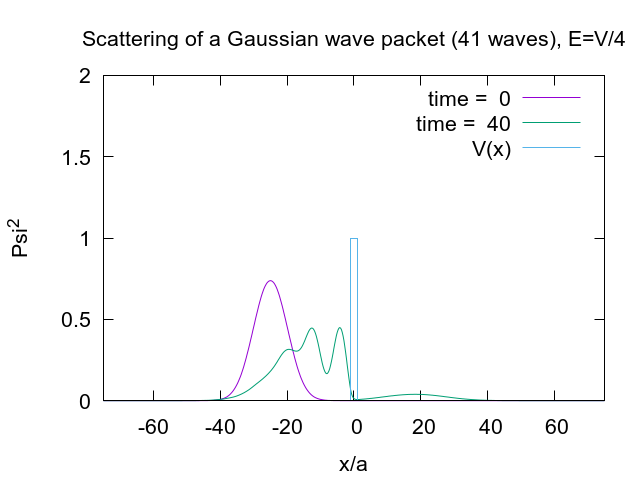

In [38]:
%%gnuplot
set style data line
set yrange [0:2]
set xrange [-75:75]
set xlabel "x/a"
set ylabel "Psi^2"
set title "Scattering of a Gaussian wave packet (41 waves), E=V/4"
plot '<./packet   0' t "time =  0",'<./packet   40' t "time =  40",'Vo.dat' t "V(x)",


## Homework: Developing the numerical part of the C code

Start by copying the skeleton of <code>packet.c</code> code from above, so that you can start making changes, recompile, and re-run. If you continue working in this jupyter notebook, the next two cells will get executed repeatedly. You can also open a separate editor window to modify the <code>packet.c</code> file and use the <code>make</code> to re-build the code after every change.

In [39]:
%%file packet.c
/*
 * packet.c
 *   packet - generate a Gaussian wavepacket impacting on an energy barrier.
 *
 * Completed: January.2018 (c) E.Sternin
 * Revisions: 
 *
 */

#ifndef VERSION           /* date-derived in Makefile */
#define VERSION "2018.01" /* default, that's when we first wrote the program */
#endif

#include <stdarg.h>
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <ctype.h>
#include <unistd.h>
#include <sys/types.h>
#include <sys/stat.h>
#include <fcntl.h>

#define MAX_STR 256

/* Global variables */

static char whoami[MAX_STR] ;        /* argv[0] will end up here */
static int  verbosity;               /* Show detailed information */
static char options[] = "Vvhp:t:";   /* command-line options, : means takes a value */
static char help_msg[] = "\
%s [<options>]\n\
\t-V        report version information\n\
\t-v        increase verbosity, may combine several\n\
\t-p #      number of points for the packet\n\
\t-t #      time since the beginning\n\
\t-h        help message\n\
\n\
e.g.\tpacket -v -p 601 -t 20\n" 
;

/*************************************************service routines************/

void __attribute__((noreturn)) die(char *msg, ...) {
  va_list args;
  va_start(args, msg);
  vfprintf(stderr, msg, args);
  fputc('\n', stderr);
  exit(1);
  }

/***************************************************************** main *********/
int main(int argc, char **argv) {
  int    i,p;
  double t;

/*
 *  default values, may get changed by the command-line options
 */
  verbosity = 0;    /* 0 = quiet by default, 1 = info, 2 = debug */	
  p = 25;           /* default to 25 points in the packet */
  t = 0;

  strncpy(whoami, argv[0], MAX_STR);

  while ((i = getopt(argc, argv, options)) != -1)
    switch (i) {
      case 'V':
         printf(" %s: version %s\n",whoami,VERSION);
         break;
      case 'v':
         verbosity++;
         if (verbosity > 1) printf(" %s: verbosity level set to %d\n",whoami,verbosity);
         break;
      case 'h':
         die(help_msg,whoami);
         break;
      case 'p':
         if ( ((p = atoi(optarg)) > 10000) || p < 10 )
           die(" %s: -p %d is not a valid number of points (10..10000)\n",whoami,p);
         if (verbosity > 1) printf(" %s: Number of points = %d\n",whoami,p);
         break;
      case 't':
         if ( ((t = atof(optarg)) < 0) )
           die(" %s: -t %d is not a valid time\n",whoami,t);
         if (verbosity > 1) printf(" %s: time = %f\n",whoami,t);
         break;
      default:
         if (verbosity > 0) die(" try %s -h\n",whoami);	/* otherwise, die quietly */
         return 0;
      }

/*
 * when we get here, we parsed all user input, and are ready to calculate things
 */

  for (i=0; i < p; i++) { 
     if (verbosity > 0) printf("%d\t%f\n",i,i*t);
     }

  return 0;
  }


Overwriting packet.c


In [40]:
%%bash
make clean; make
./packet -vvv -p10

rm -f packet *.o *~ core
cc -O -DVERSION="\"`date '+%Y-%b-%d-%H:%M'`\""  -c packet.c
cc -O -DVERSION="\"`date '+%Y-%b-%d-%H:%M'`\""  -o packet packet.o -lm
 ./packet: verbosity level set to 2
 ./packet: verbosity level set to 3
 ./packet: Number of points = 10
0	0.000000
1	0.000000
2	0.000000
3	0.000000
4	0.000000
5	0.000000
6	0.000000
7	0.000000
8	0.000000
9	0.000000
